作业2（11.3）

1、打开任意一幅灰度图片，计算该图像的图像直方图并均衡化

2、编程实现卷积函数

3、调用自写卷积函数，实现图像平滑和锐化


1、打开任意一幅灰度图片，计算该图像的图像直方图并均衡化：

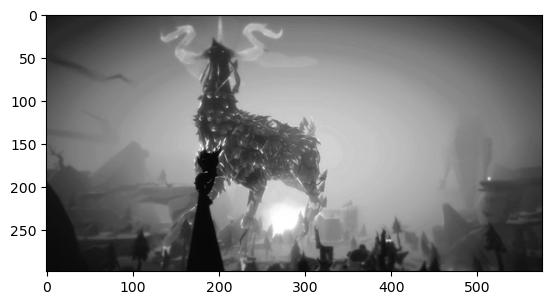

In [221]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
 
img = Image.open('image.bmp')#选择自己的图片路径导入
s=np.array(img.convert('L'))
 
plt.imshow(s, cmap='gray')#彩色图转灰度图

In [222]:
def Hist(img, show = True):
    #补充相关功能，计算图像尺寸，像素个数，灰度级个数，绘制灰度直方图
    height, width = img.shape
    histogram = np.array([0] * 256)
    for i in range(height):
        for j in range(width):
            index = img[i][j]
            histogram[index] += 1
    if show:
        plt.bar(np.arange(256), histogram)
        plt.xlabel("gray label")
        plt.ylabel("number of pixels")
        plt.axis([0, 255, 0, np.max(histogram)])
        plt.show()
    return histogram

In [223]:
def equalizeHist(img):
    #补充直方图均衡化相关功能
    hist = Hist(img, show=False)
    hist = hist / img.size
    # 累积分布函数
    cdf = hist.cumsum()
    # 使用累积分布函数进行直方图均衡化
    map = np.round(cdf * 255).astype(int)
    height, width = img.shape
    img_eql = np.zeros_like(img)
    # 实施映射
    for i in range(height):
        for j in range(width):
            img_eql[i][j] = map[img[i][j]]
    # 显示
    Hist(img_eql, show=True)
    plt.imshow(img_eql, cmap='gray')

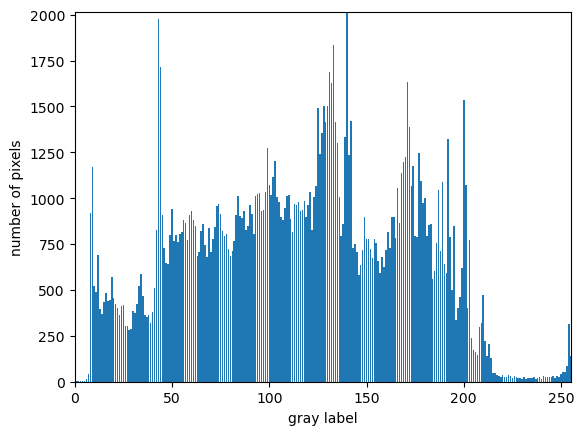

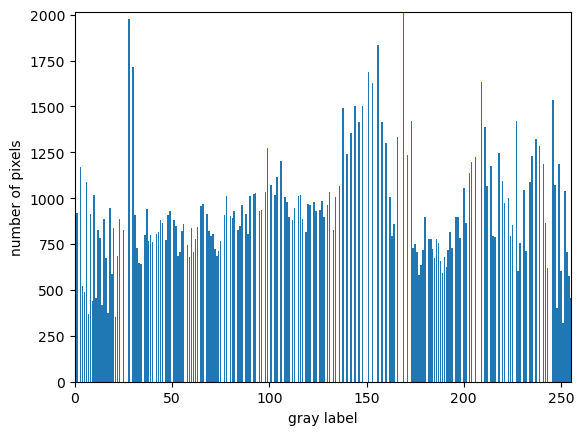

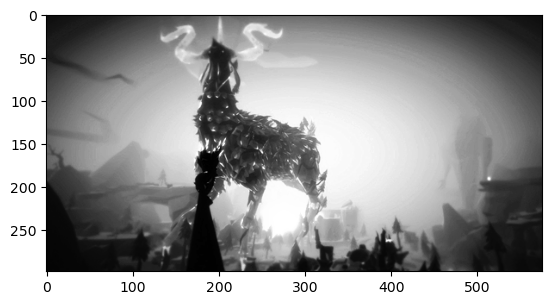

In [224]:
#直方图均衡化做对比
Hist(s)
equalizeHist(s)

2、编程实现卷积函数：

In [225]:
def conv2d(input,kernel,bias = 0, stride=1, padding=0):
    #input可以是图像经数组化的二维矩阵，kernel为卷积核本身输入，函数应可计算图像尺寸，改写卷积核，偏置，步长和填充。
    input_height, input_width = input.shape
    kernel_height, kernel_width = kernel.shape
    # 计算输出尺寸
    output_height = (input_height - kernel_height + 2 * padding) // stride + 1
    output_width = (input_width - kernel_width + 2 * padding) // stride + 1
    # padding
    if padding > 0:
        padded_input = np.pad(input, padding, mode='constant')
    else:
        padded_input = input
    # 创建输出图像数组
    output = np.zeros((output_height, output_width))
    # 卷积
    for y in range(0, output_height):
        for x in range(0, output_width):
            conv_result = np.sum(padded_input[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel)
            conv_result += bias
            output[y, x] = conv_result
    return output

3、调用自写卷积函数，实现图像平滑和锐化：

In [226]:
def smooth(img):
    #可自选卷积核，比如均值滤波，高斯滤波等等
    kernel = np.array([[1,2,1],[2,4,2],[1,2,1]]) / 16
    #调用conv2d
    img_smt = conv2d(input=img, kernel=kernel)
    #显示图像
    plt.imshow(img_smt, cmap='gray')

In [227]:
def sharpen(img):
    #可自选卷积核，比如sobel,laplacian等等
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    #调用conv2d
    img_spn = conv2d(input=img, kernel=kernel)
    #显示图像
    plt.imshow(img_spn, cmap='gray')

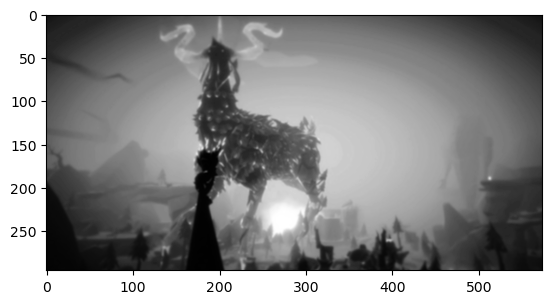

In [228]:
smooth(s)

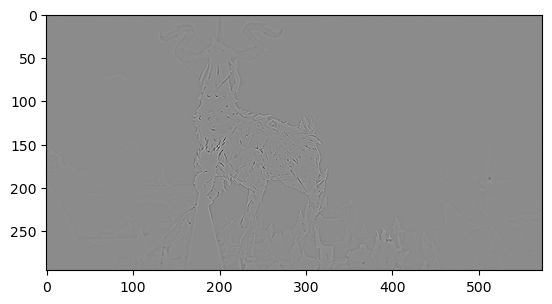

In [229]:
sharpen(s)